In [10]:
from rasterio.plot import reshape_as_raster

In [1]:
import skimage.io as skio
import numpy as np
import rasterio as rio

In [2]:
path_id = "forest"
with rio.open('/home/rave/cloud-free-planet/cfg/buffered_stacked/'+path_id+ '_stacked.tif') as dataset:
    profile = dataset.profile.copy()
    meta = dataset.meta.copy()
    arr = dataset.read()

In [3]:
arr = np.moveaxis(arr, 0, 2)
arr = np.reshape(arr, (arr.shape[0],arr.shape[1], 4, int(arr.shape[2]/4)))

In [5]:
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 1.0,
 'width': 1084,
 'height': 1082,
 'count': 156,
 'crs': CRS({'init': 'epsg:32630'}),
 'transform': Affine(3.0, 0.0, 549723.0,
        0.0, -3.0, 678441.0)}

In [11]:
for i in np.arange(arr.shape[-1]):
    blue = arr[:,:,0,i]
    green = arr[:,:,1,i]
    red = arr[:,:,2,i]
    stacked = np.stack([red, green, blue], axis = 2)
    out_path = "/home/rave/cloud-free-planet/cfg/buffered_chips/scene_number_"+str(i)+"_"+path_id+"_.tif"
    profile.update(count=3)
    with rio.open(out_path,'w',**profile) as dst:
        dst.write(reshape_as_raster(stacked))

In [15]:
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


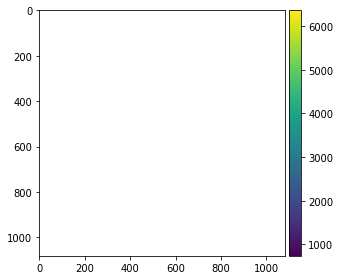

In [16]:
skio.imshow(skio.imread("/home/rave/cloud-free-planet/cfg/buffered_chips/scene_number_"+str(i)+"_"+path_id+"_.tif"))